In [37]:
from netCDF4 import Dataset
import netCDF4 as nc
import numpy as np
import pandas as pd

In [4]:
!conda install netCDF4 -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - netcdf4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cftime-1.5.0               |   py38he3068b8_0         174 KB
    hdf4-4.2.13                |       h39711bb_2         682 KB
    libnetcdf-4.7.3            |       he3b6227_0         814 KB
    netcdf4-1.5.3              |   py38h28545a2_0         438 KB
    ------------------------------------------------------------
                                           Total:         2.1 MB

The following NEW packages will be INSTALLED:

  cftime             pkgs/main/osx-64::cftime-1.5.0-py38he3068b8_0
  hdf4               pkgs/main

In [6]:
from zipfile import ZipFile

# with ZipFile('RADNL_CLIM_EM_MFBSNL25_05m_20071231T235500_20081231T235500_netCDF4_0002.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
#   zipObj.extractall()

In [7]:
onefile = 'RAD_NL25_RAC_MFBS_EM_5min_202101190700.nc'

In [40]:
import os
base_dir_hour = './RAD_NL25_RAC_MFBS_EM_5min_NC/2021/jan_day_1_hour_1/'
base_dir_day = './RAD_NL25_RAC_MFBS_EM_5min_NC/2021/jan_day_1/'
base_dir_month = './RAD_NL25_RAC_MFBS_EM_5min_NC/2021/01/'
onefile = 'RAD_NL25_RAC_MFBS_EM_5min_202101190700.nc'

from os import walk

_, _, filenames = next(walk(base_dir_month))
one_month_data = np.zeros((765, 700))

for filename in filenames:
   
    ds = Dataset(base_dir_hour + filename, mode='r')
    data = ds['image1_image_data'][:]
    #print(np.max(data))
    mydata = data.filled(0) #65535
    one_month_data = np.add(one_month_data, mydata)


FileNotFoundError: [Errno 2] No such file or directory: b'./RAD_NL25_RAC_MFBS_EM_5min_NC/2021/jan_day_1_hour_1/RAD_NL25_RAC_MFBS_EM_5min_202101090640.nc'

In [44]:
ss = Dataset(onefile, mode='r')
print(ss)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.5
    history: Metadata adjusted by ADAGUC from KNMIHDF5 to NetCDF-CF
    dimensions(sizes): y(765), x(700), time(1)
    variables(dimensions): float64 y(y), float64 x(x), float64 time(time), |S1 geographic(), |S1 image1_calibration(), uint16 image1_image_data(time,y,x), |S1 overview(), |S1 radar1(), |S1 radar2(), |S1 radar3(), |S1 product(), |S1 iso_dataset(), |S1 projection()
    groups: 


<ipython-input-44-3c42d6e3662a>:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(ss)


In [50]:
x = ss['x'][:]
aa = x.filled(0)

<ipython-input-50-a0211bddbd92>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = ss['x'][:]


In [53]:
np.min(aa)

0.5

In [444]:
len(filenames)

8928

In [446]:
np.min(one_month_data)

0.0

In [364]:
Mokedata = v1['image1_image_data'][:]
Mokedata

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]]],
  mask=[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]]],
  fill_value=65535,
  dtype=float32)

In [365]:
Mokedata.mask

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])

In [406]:
aa = Mokedata.filled(0)[0]
aa

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
import xarray as xr
file = xr.open_dataset(onefile)
file

<xarray.Dataset>
Dimensions:             (time: 1, x: 700, y: 765)
Coordinates:
  * y                   (y) float64 -3.65e+03 -3.652e+03 ... -4.414e+03
  * x                   (x) float64 0.5 1.5 2.5 3.5 ... 696.5 697.5 698.5 699.5
  * time                (time) datetime64[ns] 2021-01-19T06:55:00
Data variables:
    geographic          |S1 ...
    image1_calibration  |S1 ...
    image1_image_data   (time, y, x) float32 ...
    overview            |S1 ...
    radar1              |S1 ...
    radar2              |S1 ...
    radar3              |S1 ...
    product             |S1 ...
    iso_dataset         |S1 ...
    projection          |S1 ...
Attributes:
    Conventions:  CF-1.5
    history:      Metadata adjusted by ADAGUC from KNMIHDF5 to NetCDF-CF

In [69]:
x1 = x.__array__()

AttributeError: 'float' object has no attribute '__array__'

In [331]:
x.shape

(700,)

In [318]:
y1 = y.__array__()

In [321]:
one_month_data.shape

(765, 700)

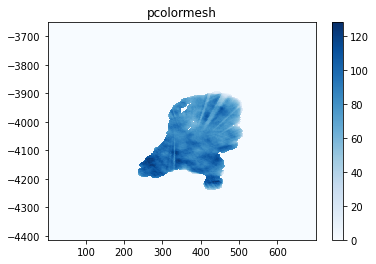

In [447]:
import matplotlib.pyplot as plt
import numpy as np

# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

# c = ax.pcolormesh(x1, y1, Mokefilled[0], cmap='Blues', vmin=0, vmax=1)

c = ax.pcolormesh(x1, y1, one_month_data[0], cmap='Blues', vmin=0, vmax=128)

# cmap - Blues, OrangeBlue

ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x1.min(), x1.max(), y1.min(), y1.max()])
fig.colorbar(c, ax=ax)

plt.show()

In [ ]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# setup stereographic basemap.
# lat_ts is latitude of true scale.
# lon_0,lat_0 is central point.
# m = Basemap(width=12000000,height=8000000,
#             resolution='l',projection='stere',\
#             lat_ts=50,lat_0=90,lon_0=-107.)


m = Basemap(width=750000,height=500000,
            resolution='l',projection='stere',\
lat_0=52.1326, lon_0=5.2913, lat_ts=50.0)

m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='aqua')
# draw tissot's indicatrix to show distortion.
ax = plt.gca()
# for y in np.linspace(m.ymax/20,19*m.ymax/20,9):
#     for x in np.linspace(m.xmax/20,19*m.xmax/20,12):
#         lon, lat = m(x,y,inverse=True)
#         poly = m.tissot(lon,lat,1.5,100,\
#                         facecolor='green',zorder=10,alpha=0.5)

# m.pcolormesh(x1, y1, mydata[0], cmap='RdBu', vmin=0, vmax=65535)

# cs = m.pcolormesh(x,y,data,cmap = my_cmap)
# m.colorbar(cs, extend = 'min')

lon,lat = m(x1,y1)


cs = m.pcolormesh(lon, lat, one_month_data[0], cmap='Blues', vmin=0, vmax=128)
m.colorbar(cs, extend = 'min')

# c = ax.pcolormesh(x1, y1, mydata[0], cmap='RdBu', vmin=0, vmax=65535)
# # c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
# ax.set_title('pcolormesh')
# # set the limits of the plot to the limits of the data
# ax.axis([x1.min(), x1.max(), y1.min(), y1.max()])
# fig.colorbar(c, ax=ax)
# plt.title("Stereographic Projection")

plt.show()

In [16]:
from pyproj import Transformer

In [17]:
pipeline_str = ("+proj=stere +lat_0=90 +lon_0=0.0 +lat_ts=60.0 +a=6378.137 +b=6356.752 +x_0=0 +y_0=0")
pipe_trans = Transformer.from_pipeline(pipeline_str)

In [19]:
transproj = Transformer.from_crs(
    crs_from = pipeline_str,
    crs_to = "EPSG:28992",
    always_xy=True
)

ProjError: Error creating Transformer from CRS.: (Internal Proj Error: proj_create_operations: Source and target ellipsoid do not belong to the same celestial body)

In [74]:
lat = 52.465
long = 4.518

xt, yt = pipe_trans.transform(long, lat)

In [75]:
f"{xt:.3f}  {yt:.3f}"

'319.214  -4039.767'

In [59]:
import pyproj
p = pyproj.Proj("+proj=stere +lat_0=90 +lon_0=0.0 +lat_ts=60.0 +a=6378.137 +b=6356.752 +x_0=0 +y_0=0")


In [67]:
x, y = p(lat, long, inverse=True)
print (x, y)

94.92185801521316 89.49472506309259


In [ ]:
# inverse= True X, Y --> long/lat

# inverse = False Long/Lat -->  X, Y

In [72]:
# (400.5, -3661.5)

lon, lat = p(400.5, -3661.5, inverse=True)
print (lon, lat)

6.242276765608849 55.68032426735717
